### imports

In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import os
cwd = os.getcwd()
print(cwd)
from IPython.display import clear_output
#from check_missing_socialmedia import visualize_amount_of_nans
import matplotlib.pyplot as plt
def visualize_amount_of_nans(dataset):
    count_of_nans_per_row = dataset.isnull().sum(axis=1)
    index_and_amount_of_nan_tuple,list_of_frequencies_nan =[],[]
    for i in range(len(count_of_nans_per_row)):
        index_and_amount_of_nan_tuple.append((i,count_of_nans_per_row[i]))
        list_of_frequencies_nan.append(count_of_nans_per_row[i])
    list_of_frequencies_nan.sort(reverse = True) 
    top_ten = list_of_frequencies_nan[:10]
    list_index_and_highest_amount_of_nans = []
    for j in index_and_amount_of_nan_tuple:
        for i in top_ten:
            if i == j[1]:
                list_index_and_highest_amount_of_nans.append(j)

    list_index_and_highest_amount_of_nans = list(set([i for i in list_index_and_highest_amount_of_nans]))
    list_index_and_highest_amount_of_nans = sorted(list_index_and_highest_amount_of_nans, key = lambda x: x[1], reverse=True) 
    plt.scatter(*zip(*index_and_amount_of_nan_tuple))
    plt.show()
    
    print("the top 10 rows with the most nans are:", top_ten)
    print('')
    print("these (index, amount of nans) are:", list_index_and_highest_amount_of_nans)
    return list_index_and_highest_amount_of_nans

pd.option_context('display.max_columns', 500)

C:\Users\jobva\OneDrive\Bureaublad\pycharm_projects\thesis_lex


### preparation

In [9]:
data = pd.read_csv('06-02-2020_18h-02m-00s.csv')

In [10]:
columns_to_drop_self = [ 'BNBBTC__ticker_info__open_time',
                         'BNBBTC__general_info__total_supply',
                         'BNBBTC__ticker_info__close_time',
                         'general_info__exchange_info__Bitcoin']

In [11]:
def drop_all_columns(data,columns_to_drop):
    print('# columns before dropping =',len(data.columns))
    df_new = data
    for i in columns_to_drop:
        df_new = df_new.drop(columns =[i])     
    print('columns after dropping =',len(df_new.columns))      
    return df_new

df_new = drop_all_columns(data,columns_to_drop_self)#,missing_features)

# columns before dropping = 400
columns after dropping = 396


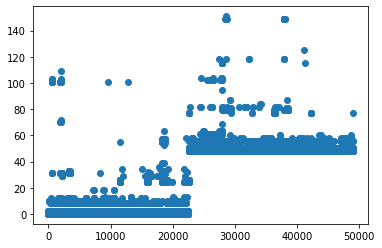

the top 10 rows with the most nans are: [151, 149, 149, 149, 149, 149, 149, 149, 149, 149]

these (index, amount of nans) are: [(28616, 151), (28481, 149), (28487, 149), (38016, 149), (37909, 149), (28648, 149), (37917, 149), (28636, 149), (37911, 149), (38007, 149), (37957, 149), (37966, 149), (37919, 149), (28630, 149), (37907, 149)]


[(28616, 151),
 (28481, 149),
 (28487, 149),
 (38016, 149),
 (37909, 149),
 (28648, 149),
 (37917, 149),
 (28636, 149),
 (37911, 149),
 (38007, 149),
 (37957, 149),
 (37966, 149),
 (37919, 149),
 (28630, 149),
 (37907, 149)]

In [16]:
visualize_amount_of_nans(df_new)

### create dataframe of features ranked on amount of nans


In [17]:
column_and_amount_of_nans = df_new.isnull().sum(axis = 0).sort_values(ascending=False)


In [18]:
df_missing = pd.DataFrame()
df_missing['features'] = list(column_and_amount_of_nans.index)

nans= []
for i in range(len(column_and_amount_of_nans)):
    nans.append(column_and_amount_of_nans[i])
    
df_missing['amount_nans']= nans

In [19]:
df_missing.head(100)

features  amount_nans
0              BTC__social_media_data__Twitter_Points        27343
1          BTC__social_media_data__Twitter_favourites        27343
2            BTC__social_media_data__Twitter_statuses        27343
3           BTC__social_media_data__Twitter_followers        27343
4    BTC__social_media_data__Twitter_account_creation        27343
..                                                ...          ...
95  general_info__hash_rate_streamer_bitcoin__time...          462
96  general_info__hash_rate_streamer_bitcoin__btc_...          462
97         general_info__stock_exchange_index__Nasdaq          116
98     general_info__stock_exchange_index__BSE_SENSEX          116
99       general_info__stock_exchange_index__Nifty_50          116

[100 rows x 2 columns]

In [20]:
def identify_missing(data,missing_threshold):
    ops= {}
    # Calculate the fraction of missing in each column 
    missing_series = data.isnull().sum() / data.shape[0]
    missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})
    # Sort with highest number of missing values on top
    missing_stats = missing_stats.sort_values('missing_fraction', ascending = False)
    # Find the columns with a missing percentage above the threshold
    record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})
    to_drop = list(record_missing['feature'])
    record_missing = record_missing
    ops['missing'] = to_drop

    print('%d features with greater than %0.2f missing values.\n' % (len(ops['missing']), missing_threshold))
    return ops   

In [21]:
list_with_to_much_missing = identify_missing(df_new,0.1)
too_much_missing = list_with_to_much_missing['missing']
too_much_missing

50 features with greater than 0.10 missing values.



['BNB__social_media_data__General_Points',
 'BNB__social_media_data__CryptoCompare_Points',
 'BNB__social_media_data__CryptoCompare_Followers',
 'BNB__social_media_data__CryptoCompare_Posts',
 'BNB__social_media_data__CryptoCompare_Comments',
 'BNB__social_media_data__CryptoCompare_PageViews',
 'BNB__social_media_data__Twitter_Points',
 'BNB__social_media_data__Twitter_lists',
 'BNB__social_media_data__Twitter_favourites',
 'BNB__social_media_data__Twitter_account_creation',
 'BNB__social_media_data__Twitter_followers',
 'BNB__social_media_data__Twitter_statuses',
 'BNB__social_media_data__Twitter_following',
 'BNB__social_media_data__Reddit_Points',
 'BNB__social_media_data__Reddit_posts_per_hour',
 'BNB__social_media_data__Reddit_community_creation',
 'BNB__social_media_data__Reddit_comments_per_hour',
 'BNB__social_media_data__Reddit_comments_per_day',
 'BNB__social_media_data__Reddit_posts_per_day',
 'BNB__social_media_data__Reddit_active_users',
 'BNB__social_media_data__Reddit_su

In [22]:
df_new = drop_all_columns(df_new,too_much_missing)

# columns before dropping = 396
columns after dropping = 346


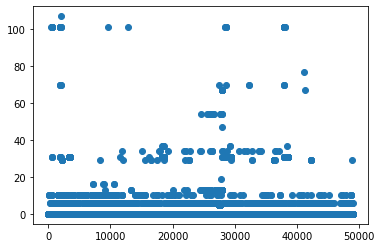

the top 10 rows with the most nans are: [107, 101, 101, 101, 101, 101, 101, 101, 101, 101]

these (index, amount of nans) are: [(1966, 107), (28636, 101), (37957, 101), (1998, 101), (37966, 101), (2008, 101), (28630, 101), (577, 101), (28481, 101), (37909, 101), (546, 101), (1896, 101), (28648, 101), (37917, 101), (12842, 101), (557, 101), (566, 101), (1868, 101), (28487, 101), (28616, 101), (561, 101), (37911, 101), (1956, 101), (1938, 101), (37919, 101), (37907, 101), (38007, 101), (1919, 101), (1907, 101), (2017, 101), (9600, 101), (38016, 101), (507, 101), (596, 101)]


[(1966, 107),
 (28636, 101),
 (37957, 101),
 (1998, 101),
 (37966, 101),
 (2008, 101),
 (28630, 101),
 (577, 101),
 (28481, 101),
 (37909, 101),
 (546, 101),
 (1896, 101),
 (28648, 101),
 (37917, 101),
 (12842, 101),
 (557, 101),
 (566, 101),
 (1868, 101),
 (28487, 101),
 (28616, 101),
 (561, 101),
 (37911, 101),
 (1956, 101),
 (1938, 101),
 (37919, 101),
 (37907, 101),
 (38007, 101),
 (1919, 101),
 (1907, 101),
 (2017, 101),
 (9600, 101),
 (38016, 101),
 (507, 101),
 (596, 101)]

In [23]:
visualize_amount_of_nans(df_new)

### normalize, describe, var testing:


In [24]:
df_new.describe()

last_start_time  BNBBTC__technical_analysis_candles__rsi  \
count     4.895800e+04                             48403.000000   
mean      1.582481e+09                                49.920914   
std       8.479861e+05                                13.182508   
min       1.581012e+09                                 0.123543   
25%       1.581746e+09                                41.097858   
50%       1.582481e+09                                49.685092   
75%       1.583215e+09                                58.492244   
max       1.583950e+09                                97.400817   

       BNBBTC__technical_analysis_candles__macd  \
count                              4.840300e+04   
mean                              -4.366958e-09   
std                                2.633101e-06   
min                               -1.953100e-05   
25%                               -1.277743e-06   
50%                               -7.077166e-08   
75%                                1.203474e-06   
max                                2.550804e-05   

       BNBBTC__technical_analysis_candles__signal  \
count                                4.840300e+04   
mean                                -4.029645e-09   
std                                  2.478573e-06   
min                                 -1.715938e-05   
25%                                 -1.214474e-06   
50%                                 -7.784729e-08   
75%                                  1.131532e-06   
max                                  2.228575e-05   

       BNBBTC__technical_analysis_candles__macdhist  \
count                                  4.840300e+04   
mean                                   3.373122e-10   
std                                    7.941844e-07   
min                                   -8.341572e-06   
25%                                   -3.745554e-07   
50%                                    4.655688e-09   
75%                                    3.833930e-07   
max                                    8.120856e-06   

       BNBBTC__technical_analysis_candles__sma_5  \
count                               48403.000000   
mean                                    0.002297   
std                                     0.000126   
min                                     0.002048   
25%                                     0.002209   
50%                                     0.002282   
75%                                     0.002366   
max                                     0.002612   

       BNBBTC__technical_analysis_candles__sma_10  \
count                                48403.000000   
mean                                     0.002297   
std                                      0.000126   
min                                      0.002049   
25%                                      0.002209   
50%                                      0.002282   
75%                                      0.002366   
max                                      0.002609   

       BNBBTC__technical_analysis_candles__sma_21  \
count                                48403.000000   
mean                                     0.002297   
std                                      0.000126   
min                                      0.002051   
25%                                      0.002210   
50%                                      0.002282   
75%                                      0.002366   
max                                      0.002608   

       BNBBTC__technical_analysis_candles__sma_50  \
count                                48403.000000   
mean                                     0.002297   
std                                      0.000126   
min                                      0.002055   
25%                                      0.002210   
50%                                      0.002282   
75%                                      0.002366   
max                                      0.002602   

       BNBBTC__technical_analysis_candles__sma_100  ...  \
count  

In [25]:
from sklearn import preprocessing

x = df_new.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_new_norm = pd.DataFrame(x_scaled,columns=df_new.columns)

In [26]:
df_new_norm

last_start_time  BNBBTC__technical_analysis_candles__rsi  \
0             0.000000                                 0.573306   
1             0.000020                                 0.583659   
2             0.000041                                 0.642194   
3             0.000061                                 0.689013   
4             0.000082                                 0.809833   
...                ...                                      ...   
48953         0.999918                                 0.246247   
48954         0.999939                                 0.303948   
48955         0.999959                                 0.424812   
48956         0.999980                                 0.353003   
48957         1.000000                                 0.344900   

       BNBBTC__technical_analysis_candles__macd  \
0                                      0.440403   
1                                      0.442430   
2                                      0.447107   
3                                      0.453629   
4                                      0.470909   
...                                         ...   
48953                                  0.326421   
48954                                  0.330096   
48955                                  0.338052   
48956                                  0.341123   
48957                                  0.344053   

       BNBBTC__technical_analysis_candles__signal  \
0                                        0.432041   
1                                        0.434643   
2                                        0.437792   
3                                        0.441801   
4                                        0.448954   
...                                           ...   
48953                                    0.316014   
48954                                    0.316168   
48955                                    0.318108   
48956                                    0.320362   
48957                                    0.322833   

       BNBBTC__technical_analysis_candles__macdhist  \
0                                          0.481083   
1                                          0.481769   
2                                          0.476520   
3                                          0.468282   
4                                          0.438146   
...                                             ...   
48953                                      0.514913   
48954                                      0.505228   
48955                                      0.488110   
48956                                      0.485106   
48957                                      0.483013   

       BNBBTC__technical_analysis_candles__sma_5  \
0                                       0.081882   
1                                       0.082946   
2                                       0.084507   
3                                       0.086387   
4                                       0.089900   
...                                          ...   
48953                                   0.011246   
48954                                   0.010253   
48955                                   0.010537   
48956                                   0.010998   
48957                                   0.011353   

       BNBBTC__technical_analysis_candles__sma_10  \
0                                        0.081074   
1                                        0.081181   
2                                        0.081735   
3                                        0.082485   
4                                        0.084449   
...                                           ...   
48953                                    0.012161   
48954                                    0.011465   
48955                                    0.011358   
48956                                    0.010750   
48957                                    0.010161   

       BNBBTC__technical_anal

In [27]:
df_new_norm2 = pd.DataFrame(min_max_scaler.fit_transform(df_new), columns=df_new.columns, index=df_new.index)
df_new_norm2

last_start_time  BNBBTC__technical_analysis_candles__rsi  \
0             0.000000                                 0.573306   
1             0.000020                                 0.583659   
2             0.000041                                 0.642194   
3             0.000061                                 0.689013   
4             0.000082                                 0.809833   
...                ...                                      ...   
48953         0.999918                                 0.246247   
48954         0.999939                                 0.303948   
48955         0.999959                                 0.424812   
48956         0.999980                                 0.353003   
48957         1.000000                                 0.344900   

       BNBBTC__technical_analysis_candles__macd  \
0                                      0.440403   
1                                      0.442430   
2                                      0.447107   
3                                      0.453629   
4                                      0.470909   
...                                         ...   
48953                                  0.326421   
48954                                  0.330096   
48955                                  0.338052   
48956                                  0.341123   
48957                                  0.344053   

       BNBBTC__technical_analysis_candles__signal  \
0                                        0.432041   
1                                        0.434643   
2                                        0.437792   
3                                        0.441801   
4                                        0.448954   
...                                           ...   
48953                                    0.316014   
48954                                    0.316168   
48955                                    0.318108   
48956                                    0.320362   
48957                                    0.322833   

       BNBBTC__technical_analysis_candles__macdhist  \
0                                          0.481083   
1                                          0.481769   
2                                          0.476520   
3                                          0.468282   
4                                          0.438146   
...                                             ...   
48953                                      0.514913   
48954                                      0.505228   
48955                                      0.488110   
48956                                      0.485106   
48957                                      0.483013   

       BNBBTC__technical_analysis_candles__sma_5  \
0                                       0.081882   
1                                       0.082946   
2                                       0.084507   
3                                       0.086387   
4                                       0.089900   
...                                          ...   
48953                                   0.011246   
48954                                   0.010253   
48955                                   0.010537   
48956                                   0.010998   
48957                                   0.011353   

       BNBBTC__technical_analysis_candles__sma_10  \
0                                        0.081074   
1                                        0.081181   
2                                        0.081735   
3                                        0.082485   
4                                        0.084449   
...                                           ...   
48953                                    0.012161   
48954                                    0.011465   
48955                                    0.011358   
48956                                    0.010750   
48957                                    0.010161   

       BNBBTC__technical_anal

In [28]:
#beide normalizaties zijn hetzelfde
df_new_norm.equals(df_new_norm2)

True

In [29]:
lijst= [] 
count = 0
for i in df_new_norm2.columns:
    count+=1
    if df_new_norm2[i].var():
        lijst.append((i,df_new_norm2[i].var()))
lijst
first,snd = zip(*lijst)
alle_variances = pd.DataFrame()
alle_variances['variances'] = snd
alle_variances['features'] = first
alle_variances

variances                                           features
0     0.083338                                    last_start_time
1     0.018364            BNBBTC__technical_analysis_candles__rsi
2     0.003418           BNBBTC__technical_analysis_candles__macd
3     0.003948         BNBBTC__technical_analysis_candles__signal
4     0.002327       BNBBTC__technical_analysis_candles__macdhist
..         ...                                                ...
337   0.061946       general_info__exchange_info__Vietnamese_dong
338   0.050385    general_info__exchange_info__South_African_Rand
339   0.062866  general_info__exchange_info__IMF_Special_Drawi...
340   0.050718     general_info__exchange_info__Silver_Troy_Ounce
341   0.064768       general_info__exchange_info__Gold_Troy_Ounce

[342 rows x 2 columns]

In [40]:
[(x,y) for x,y in df_new_norm2.var()]

TypeError: cannot unpack non-iterable float object

In [137]:
list(counts.keys())[0]

0.0

Columns in the lowest bin are : 
  ['BNBBTC__general_info__market_cap_rank', 'BNBBTC__general_info__ath', 'general_info__hash_rate_streamer_bitcoin__block_reward', 'general_info__stock_exchange_index__S_P_CLX_IPSA', 'BNB__twitter_info_aggregated__total_followers', 'general_info__twitter_info_aggregated__total_followers', 'BTC__twitter_info_aggregated__count', 'BNBBTC__ticker_info__askQty', 'BNB__twitter_info_aggregated__total_friends', 'BTC__twitter_info_aggregated__total_followers', 'BNBBTC__ticker_info__bidQty', 'BNBBTC__ticker_info__taker_buy_asset_volume', 'BTC__events_aggregator__NumSources_7_days', 'BNBBTC__ticker_info__taker_buy_quote_asset_volume', 'general_info__econ_bitcoin_aggregator__V2Tone_5_7_days', 'BNBBTC__ticker_info__quote_asset_volume', 'BNBBTC__ticker_info__volume', 'general_info__events_aggregator__NumSources_7_days', 'general_info__twitter_info_aggregated__total_friends', 'general_info__econ_bitcoin_aggregator__V2Tone_2_7_days', 'BNB__events_aggregator__AvgTone_1_

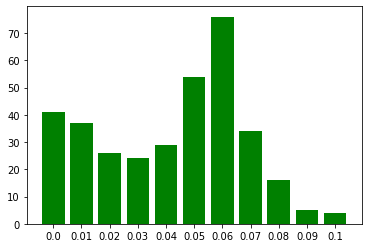

In [146]:
from collections import Counter
precision_rounding = 2#how precise should the variance be, ,less --> smaller bins 
#remove_lowest_bins_number = 1 #emove the ... lowest bins 
#remove_highest_bins_number= 1 #emove the ... highest bins 


def analyse_variance():
    column_in_lowest_cat = []
    column_in_highest_cat = [] 
    variance = [(x,y) for x,y in list(zip(df_new_norm2,df_new_norm2.var()))] #calc variance 
    variance.sort(key=lambda tup: tup[1])  #sort the variance 
    variance_rounded = [(name,round(var,precision_rounding)) for name,var in variance] #do the rounding 
    counts = Counter(x[1] for x in variance_rounded)#count how many in a bin 
    lowest_bar = list(counts.keys())[0]
    highest_bar = list(counts.keys())[-1]
    plt.bar([ str(i) for i in counts.keys()], counts.values(), color='g') 
    for column in variance_rounded:
        if column[1] == lowest_bar:
            column_in_lowest_cat.append(column[0])
        elif column[1] == highest_bar:
            column_in_highest_cat.append(column[0])   
    print('Columns in the lowest bin are : \n ', column_in_lowest_cat)
    print(' ------------ ')
    print('Columns in the highest bin are : \n ', column_in_highest_cat)

analyse_variance()

In [79]:
counts.keys()

dict_keys([0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.077, 0.079, 0.08, 0.081, 0.083, 0.084, 0.085, 0.088, 0.092, 0.098, 0.102, 0.103])

In [30]:
fig = px.scatter(data, x=alle_variances.index, y=alle_variances['variances'])  
fig.update_layout(
    xaxis = dict(
        tickangle = 45,
        title_text = "plot met alle variances om te kijken hoe verdeld",
        title_font = {"size": 15}))

### erdeling is niet zo mega duidelijk, ik dacht eraan om ze hier nog een keer te normalizeren, zo krijg je een iets beter idee en makkelijke grenzen
alleen weet niet of dit mag


Las ook dat je soms de Index of dispersion kam weergeven = variance/mean

In [31]:
x = alle_variances[['variances']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized_var = pd.DataFrame(x_scaled)
df_normalized_var
                                

0
0    0.808115
1    0.177571
2    0.032524
3    0.037672
4    0.021941
..        ...
337  0.600512
338  0.488322
339  0.609442
340  0.491546
341  0.627894

[342 rows x 1 columns]

In [32]:
#vervang de var kolom met de genormalizeerde var.
alle_variances['variances'] = df_normalized_var[0]
alle_variances

variances                                           features
0     0.808115                                    last_start_time
1     0.177571            BNBBTC__technical_analysis_candles__rsi
2     0.032524           BNBBTC__technical_analysis_candles__macd
3     0.037672         BNBBTC__technical_analysis_candles__signal
4     0.021941       BNBBTC__technical_analysis_candles__macdhist
..         ...                                                ...
337   0.600512       general_info__exchange_info__Vietnamese_dong
338   0.488322    general_info__exchange_info__South_African_Rand
339   0.609442  general_info__exchange_info__IMF_Special_Drawi...
340   0.491546     general_info__exchange_info__Silver_Troy_Ounce
341   0.627894       general_info__exchange_info__Gold_Troy_Ounce

[342 rows x 2 columns]

In [33]:
fig = px.scatter(data, x=alle_variances.index, y=alle_variances['variances'])  
fig.update_layout(
    xaxis = dict(
        tickangle = 45,
        title_text = "plot met alle variances om te kijken hoe verdeld",
        title_font = {"size": 15}))

In [34]:
def divide_variances(df,threshold_low, threshold_high):
    low_var,high_var = [],[]
    for i in range(len(df['variances'])):
        if df['variances'][i]< threshold_low:
            low_var.append((df['variances'][i],df['features'][i]))
        elif df['variances'][i] > threshold_high:
            high_var.append((df['variances'][i],df['features'][i]))
    return low_var, high_var

In [35]:
low, high = divide_variances(alle_variances,0.1,0.8)
print(low)
print(high)


[(0.03252401506902009, 'BNBBTC__technical_analysis_candles__macd'), (0.037672058485498115, 'BNBBTC__technical_analysis_candles__signal'), (0.021940592362006444, 'BNBBTC__technical_analysis_candles__macdhist'), (0.006019195060121047, 'BNBBTC__ticker_info__volume'), (0.005975758645720213, 'BNBBTC__ticker_info__quote_asset_volume'), (0.02137370069305553, 'BNBBTC__ticker_info__number_trades'), (0.004365469729075538, 'BNBBTC__ticker_info__taker_buy_asset_volume'), (0.005062963666200106, 'BNBBTC__ticker_info__taker_buy_quote_asset_volume'), (0.003336472431001098, 'BNBBTC__ticker_info__bidQty'), (0.0014575992768763842, 'BNBBTC__ticker_info__askQty'), (0.011677579014659085, 'BNB__events_aggregator__AvgTone_1_hour'), (0.09397139137408302, 'BNB__events_aggregator__AvgTone_8_hour'), (0.0717619919390624, 'BNB__events_aggregator__NumSources_1_hour'), (0.013170365554974483, 'BNB__events_aggregator__GoldsteinScale_1_hour'), (0.09266454309779523, 'BNB__events_aggregator__GoldsteinScale_8_hour'), (0.03

### loop through all features and plot them to visualize features

In [36]:
#convert timestamp to usable format
timestamp_x = []
for i in range(len(data['last_start_time'])):
    timestamp_x.append(datetime.utcfromtimestamp(data['last_start_time'][i]).strftime('%d-%m-%Y %H:%M:%S'))


In [37]:
def create_graph2(data):  
    n = 0
    while n < len(data.index):
        fig = px.line(data, x=timestamp_x, y=data.columns[n])   #data[column_and_amount_of_nans.index[n]])    #X=timestamp_x
        fig.update_layout(
            xaxis = dict(
                tickangle = 45,
                title_text = "timestamps",
                title_font = {"size": 15}))
        print('index: ', n)
        print(data.columns[n])
        print('amount of nans:', len(data[data.columns[n]])- data[data.columns[n]].count())
        fig.show()
        vraag = input("hoeveel wil je erbij of eraf? <enter = +1>")
        if vraag == "":
            n+=1
        else:
            n+= int(vraag)
        clear_output(wait=True)

In [38]:
#deze blijft lopen, om te stoppen moet je gewoon getal groter dan de len invullen dan breakt ie
create_graph2(df_new)

index:  11
BNBBTC__technical_analysis_candles__sma_1440
amount of nans: 555


hoeveel wil je erbij of eraf? <enter = +1>1000


KeyboardInterrupt: 

### check which indexes are nan

In [ ]:
def return_index_of_nans(column_name):
    index = df_new[column_name].index[df_new[column_name].apply(np.isnan)]
    df_index = df_new.index.values.tolist()
    print(len([df_index.index(i) for i in index]))
    return [df_index.index(i) for i in index]

return_index_of_nans("BNBBTC__ticker_info__bidPrice")    

### based on create_graph2 deviating features


In [ ]:
#labeled by hand --> nog niet gedaan, wil ik nu dus niet meer met de hand doen.
indexes_no_simple_imputation = []
indexes_might_be_deleted = []
indexes_of_doubt = []

In [ ]:
def create_list_based_on_index(df_missing,list_of_indexes):
    list_grouped_per_imputation = []
    for i in list_of_indexes:
        list_grouped_per_imputation.append(df_missing['features'][i])
    return list_grouped_per_imputation
    

In [ ]:
no_simple_imputation = create_list_based_on_index(df_missing, indexes_no_simple_imputation)
# no_simple_imputation)

In [ ]:
might_be_deleted = create_list_based_on_index(df_missing, indexes_might_be_deleted)
# might_be_deleted

In [ ]:
doubt = create_list_based_on_index(df_missing, indexes_of_doubt)
# doubt

In [ ]:
def calculate_simple_imputation_list(df_missing,no_simple_imputation,might_be_deleted,doubt,too_much_missing):
    indexes_of_simple_imputation = []
    test =[]
    for i in df_missing['features']:
        if not i in no_simple_imputation:
            if not i in might_be_deleted:
                if not i in doubt:
                    if not i in too_much_missing:
                        indexes_of_simple_imputation.append(i)
    return indexes_of_simple_imputation

In [ ]:
features_for_simple_imputation = calculate_simple_imputation_list(df_missing,no_simple_imputation,might_be_deleted,doubt,too_much_missing)
len(features_for_simple_imputation)

In [ ]:
# invullen met simple interpolation method.

In [ ]:
data_price = data['BNBBTC__ticker_info__close_price']
fig = px.line(data, x=data.index, y=df_new['BTC__twitter_info_aggregated__relative_subjectivity_friends'])
fig.update_layout(
    xaxis = dict(
        tickangle = 45,
        title_text = "timestamps",
        title_font = {"size": 15}))
fig.show()

In [ ]:
df_new2 = df_new
df_new2['BTC__twitter_info_aggregated__relative_subjectivity_friends'] = df_new2['BTC__twitter_info_aggregated__relative_subjectivity_friends'].interpolate(method='linear')
data_price = data['BNBBTC__ticker_info__close_price']


fig = px.line(data, x=data.index, y=df_new2['BTC__twitter_info_aggregated__relative_subjectivity_friends'])
fig.update_layout(
    xaxis = dict(
        tickangle = 45,
        title_text = "timestamps",
        title_font = {"size": 15}))
fig.show()